## Import Library

In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import pickle
import math
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy import optimize
from scipy.stats import mode
from concurrent.futures import ProcessPoolExecutor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Import Pre-processed Data

In [ ]:
!mkdir -p content/data
# Download all files
file_ids = [
    '1fdbbwFuXm0zrXYi3i9MvCqilA9i7OcZq',  # X_train
    '1-1iUTztO9XpxwzF02JhoW3pdMs5jKrw1',  # X_train_resampled
    '1-39uqbcZldsGLgDKYfxIHsSNGewMXJRR',  # X_test
    '1Ms25aS5NADPDYdt8AGAUyYIjbdBvKGFZ',  # X_test_resampled
    '1-CChPe58Z6E-H6EXIzKsgUhqbITAd54z',  # Y_train
    '1D3wYlWZbt5NeM59QTA1JaVVvnaAZzFUf',  # Y_train_resampled
    '1-CUpVhcZ6-Qop7R9Z6Btb2gEf7f0XgGy'   # Y_test
]

file_paths = [
    'content/data/X_train.pkl',
    'content/data/X_train_resampled.pkl',
    'content/data/X_test.pkl',
    'content/data/X_test_resampled.pkl',
    'content/data/Y_train.pkl',
    'content/data/Y_train_resampled.pkl',
    'content/data/Y_test.pkl'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fdbbwFuXm0zrXYi3i9MvCqilA9i7OcZq
To: /content/content/data/X_train.pkl
100%|██████████| 21.4M/21.4M [00:00<00:00, 38.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1iUTztO9XpxwzF02JhoW3pdMs5jKrw1
To: /content/content/data/X_train_resampled.pkl
100%|██████████| 18.7M/18.7M [00:00<00:00, 37.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-39uqbcZldsGLgDKYfxIHsSNGewMXJRR
To: /content/content/data/X_test.pkl
100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ms25aS5NADPDYdt8AGAUyYIjbdBvKGFZ
To: /content/content/data/X_test_resampled.pkl
100%|██████████| 5.35M/5.35M [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-CChPe58Z6E-H6EXIzKsgUhqbITAd54z
To: /content/content/data/Y_train.pkl
100%|██████████| 2.79M/2.79M [00:00<00:00, 229MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D3wYlWZbt5NeM59QTA1JaVVvnaAZzFUf
To: /content/

In [ ]:
X_train = pd.read_pickle('content/data/X_train.pkl')
X_train_resampled = pd.read_pickle('content/data/X_train_resampled.pkl')
X_test = pd.read_pickle('content/data/X_test.pkl')
X_test_resampled = pd.read_pickle('content/data/X_test_resampled.pkl')
y_train = pd.read_pickle('content/data/Y_train.pkl')
y_train_resampled = pd.read_pickle('content/data/Y_train_resampled.pkl')
y_test = pd.read_pickle('content/data/Y_test.pkl')

In [ ]:
result_acc=[]
result_recall=[]
pred_time = []

## 1. Random Forest - Thư viện

### No Resample

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
def evaluate(model):
    y_pred = model.predict(X_train)
    print("Training accuracy: " + str(accuracy_score(y_train, y_pred)))
    y_pred = model.predict(X_val)
    print("Validation accuracy: " + str(accuracy_score(y_val, y_pred)))
    y_pred = model.predict(X_test)
    print("Test accuracy: " + str(accuracy_score(y_test, y_pred)))

In [ ]:
# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
# Huấn luyện mô hình
rf.fit(X_train, y_train)
start_time = time.time()
y_pred = rf.predict(X_test)
end_time = time.time()
predict_time = end_time-start_time
acc = accuracy_score(y_test, y_pred)*100
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 87.44%
Time to predict: 1.0490 seconds


In [ ]:
evaluate(rf)

Training accuracy: 0.9999892581691624
Validation accuracy: 0.8698547735670705
Test accuracy: 0.874364086346762


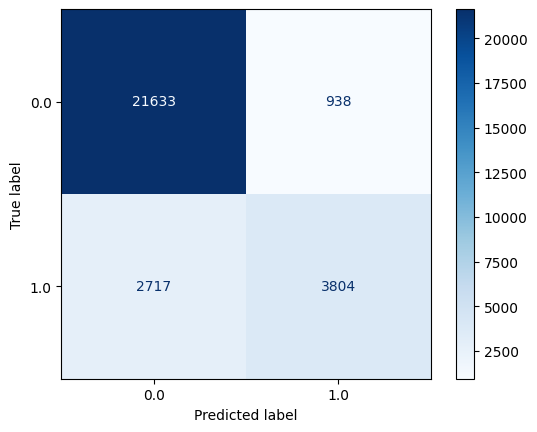

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     22571
         1.0       0.80      0.58      0.68      6521

    accuracy                           0.87     29092
   macro avg       0.85      0.77      0.80     29092
weighted avg       0.87      0.87      0.87     29092



In [ ]:
recall_s = recall_score(y_test, rf.predict(X_test), average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là', recall_s[0])

Tỉ lệ dự đoán đúng ngày mai có mưa là 0.5833461125594234
Tỉ lệ dự đoán đúng ngày mai không có mưa là 0.9584422489034602


In [ ]:
# Khởi tạo mô hình Random Forest cơ bản
rf_model = RandomForestClassifier(random_state=42)

# Định nghĩa các tham số mà GridSearch sẽ tìm kiếm
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Khởi tạo GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# In ra tham số tốt nhất mà GridSearch tìm được
print("Best parameters found by GridSearchCV for RF:", grid_search_rf.best_params_)

Best parameters found by GridSearchCV for RF: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best n_estimators : {'n_estimators': 500}
Best accuracy: 0.8737404884281901


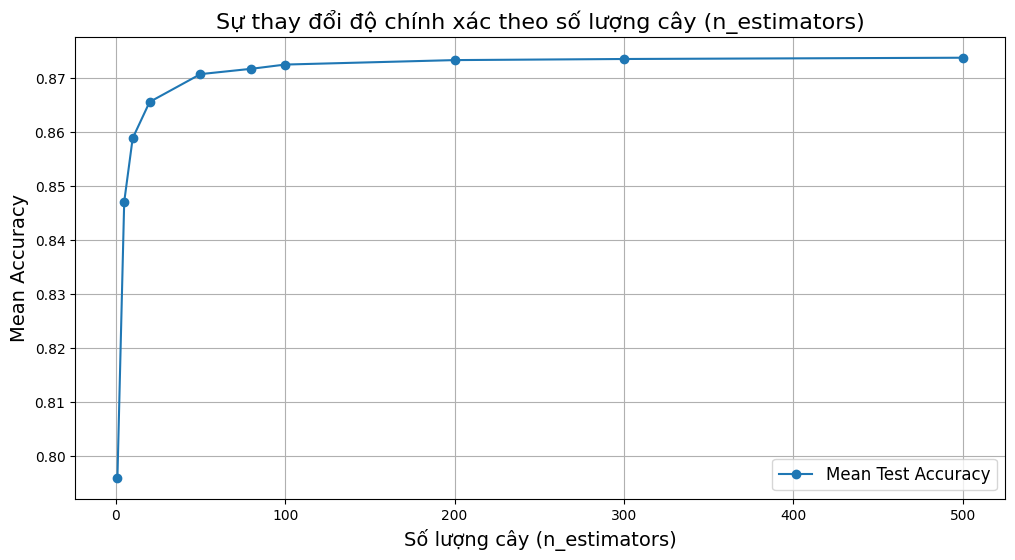

In [ ]:
rf_model = RandomForestClassifier(criterion='gini',random_state=42)

param_grid_rf = {
    'n_estimators': [1, 5, 10, 20, 50, 80, 100, 200, 300, 500]
}
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf.fit(X_train, y_train)
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_
print("Best n_estimators :", best_params)
print("Best accuracy ", best_score)

# Chuyển đổi kết quả từ GridSearchCV thành DataFrame
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Vẽ biểu đồ sự thay đổi độ chính xác theo số lượng cây (n_estimators)
plt.figure(figsize=(12, 6))
plt.plot(
    cv_results["param_n_estimators"],
    cv_results["mean_test_score"]*100,
    marker="o",
    linestyle="-",
)

plt.title("Sự thay đổi độ chính xác theo số lượng cây (n_estimators)", fontsize=16)
plt.xlabel("Số lượng cây (n_estimators)", fontsize=14)
plt.ylabel("Mean Accuracy(%)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best max_depth: {'max_depth': 50}
Best accuracy: 0.8724729613892332


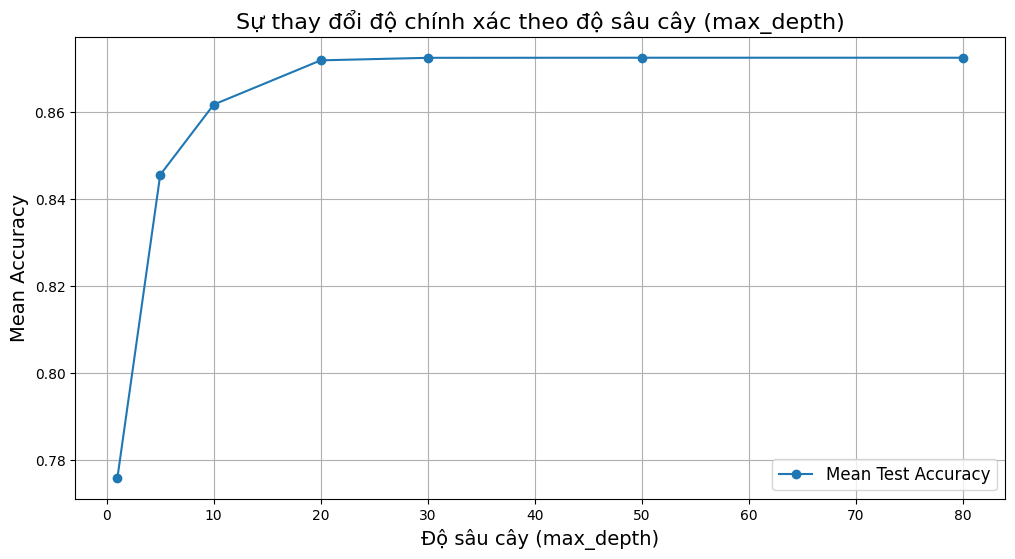

In [ ]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(criterion='gini', random_state=42)

# Định nghĩa các tham số cho GridSearch với độ sâu cây
param_grid_rf = {
    'max_depth': [1, 5, 10, 20, 30, 50, 80, None]  # None đại diện cho không giới hạn độ sâu
}

# Khởi tạo GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

# Huấn luyện GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Lấy tham số và điểm số tốt nhất
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_
print("Best max_depth:", best_params)
print("Best accuracy:", best_score)

# Chuyển đổi kết quả từ GridSearchCV thành DataFrame
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Vẽ biểu đồ sự thay đổi độ chính xác theo độ sâu cây (max_depth)
plt.figure(figsize=(12, 6))
plt.plot(
    cv_results["param_max_depth"],
    cv_results["mean_test_score"]*100,
    marker="o",
    linestyle="-",
)

plt.title("Sự thay đổi độ chính xác theo độ sâu cây (max_depth)", fontsize=16)
plt.xlabel("Độ sâu cây (max_depth)", fontsize=14)
plt.ylabel("Mean Accuracy (%)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# Khởi tạo mô hình Random Forest
rf_tune = RandomForestClassifier(criterion='gini',n_estimators=500, max_depth=50,random_state=42)
# Huấn luyện mô hình
rf_tune.fit(X_train, y_train)
start_time = time.time()
y_tune_pred = rf_tune.predict(X_test)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
acc = accuracy_score(y_test, y_tune_pred)*100
result_acc.append(acc)
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 87.56%
Time to predict: 4.3410 seconds


In [ ]:
evaluate(rf_tune)

Training accuracy: 1.0
Validation accuracy: 0.874065480794019
Test accuracy: 0.8755671662312663


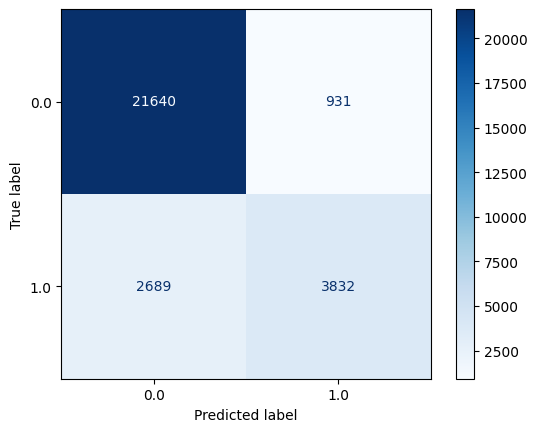

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_tune, X_test, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
print(classification_report(y_test, y_tune_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     22571
         1.0       0.80      0.59      0.68      6521

    accuracy                           0.88     29092
   macro avg       0.85      0.77      0.80     29092
weighted avg       0.87      0.88      0.87     29092



In [ ]:
recall_s = recall_score(y_test, rf.predict(X_test), average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là', recall_s[0])
result_recall.append(recall_s)

Tỉ lệ dự đoán đúng ngày mai có mưa là 0.5833461125594234
Tỉ lệ dự đoán đúng ngày mai không có mưa là 0.9584422489034602


### Resampled

In [ ]:
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

In [ ]:
def evaluate_resampled(model):
    y_pred = model.predict(X_train_resampled)
    print("Training accuracy: " + str(accuracy_score(y_train_resampled, y_pred)))
    y_pred = model.predict(X_val_resampled)
    print("Validation accuracy: " + str(accuracy_score(y_val_resampled, y_pred)))
    y_pred = model.predict(X_test_resampled)
    print("Test accuracy: " + str(accuracy_score(y_test, y_pred)))

In [ ]:
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)
start_time = time.time()
y_resampled_pred = rf_resampled.predict(X_test_resampled)
end_time = time.time()
predict_time = end_time-start_time
acc = accuracy_score(y_test, y_resampled_pred)*100
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 86.59%
Time to predict: 1.3947 seconds


In [ ]:
evaluate_resampled(rf_resampled)

Training accuracy: 1.0
Validation accuracy: 0.8806734271930688
Test accuracy: 0.86587377973326


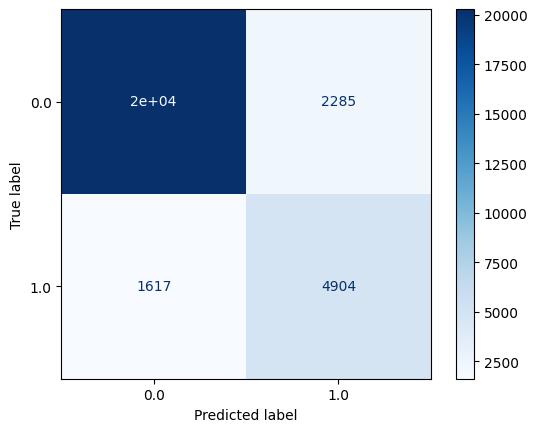

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_resampled, X_test_resampled, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
y_resampled_pred= rf_resampled.predict(X_test_resampled)
print(classification_report(y_test, y_resampled_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     22571
         1.0       0.68      0.75      0.72      6521

    accuracy                           0.87     29092
   macro avg       0.80      0.83      0.81     29092
weighted avg       0.87      0.87      0.87     29092



In [ ]:
recall_s = recall_score(y_test, rf_resampled.predict(X_test_resampled), average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là', recall_s[0])

Tỉ lệ dự đoán đúng ngày mai có mưa là 0.7520318969483208
Tỉ lệ dự đoán đúng ngày mai không có mưa là 0.8987639005803908


In [ ]:
# Khởi tạo mô hình Random Forest cơ bản
rf_resampled_model = RandomForestClassifier(random_state=42)

# Định nghĩa các tham số mà GridSearch sẽ tìm kiếm
param_grid_rf_resampled = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'criterion': ['gini', 'entropy']
}

# Khởi tạo GridSearchCV
grid_search_rf_resampled = GridSearchCV(
    estimator= rf_resampled_model,
    param_grid=param_grid_rf_resampled,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf_resampled.fit(X_train_resampled, y_train_resampled)
print("Best parameters found by GridSearchCV for RF:", grid_search_rf_resampled.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found by GridSearchCV for RF: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}


Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best n_estimators : {'n_estimators': 300}
Best accuracy  0.8720694111131623


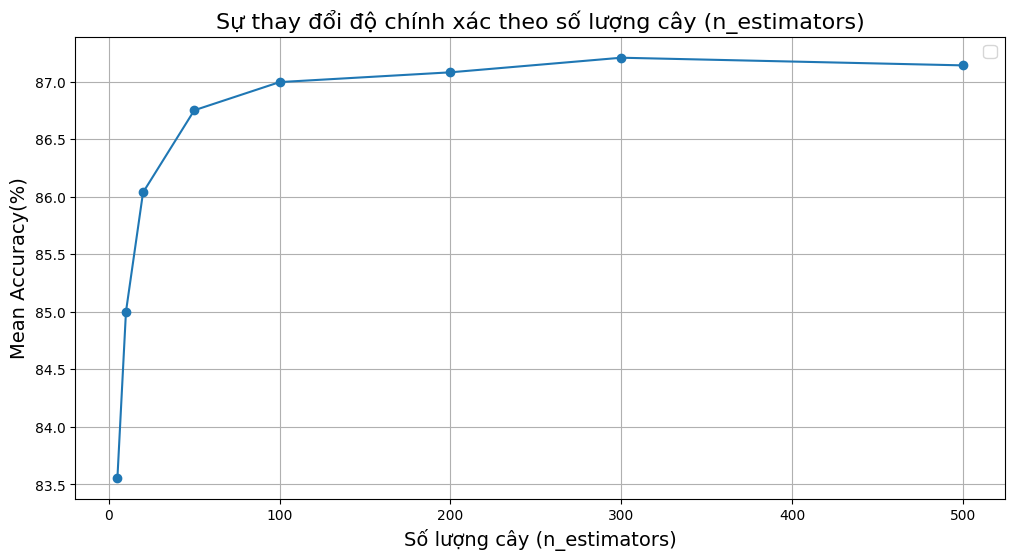

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy',max_depth=30, random_state=42)

param_grid_rf = {
    'n_estimators': [5, 10, 20, 50, 100, 200, 300, 500]
}
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_
print("Best n_estimators :", best_params)
print("Best accuracy ", best_score)

# Chuyển đổi kết quả từ GridSearchCV thành DataFrame
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Vẽ biểu đồ sự thay đổi độ chính xác theo số lượng cây (n_estimators)
plt.figure(figsize=(12, 6))
plt.plot(
    cv_results["param_n_estimators"],
    cv_results["mean_test_score"]*100,
    marker="o",
    linestyle="-",
)

plt.title("Sự thay đổi độ chính xác theo số lượng cây (n_estimators)", fontsize=16)
plt.xlabel("Số lượng cây (n_estimators)", fontsize=14)
plt.ylabel("Mean Accuracy(%)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best max_depth: {'max_depth': 50}
Best accuracy: 0.8720694111131623


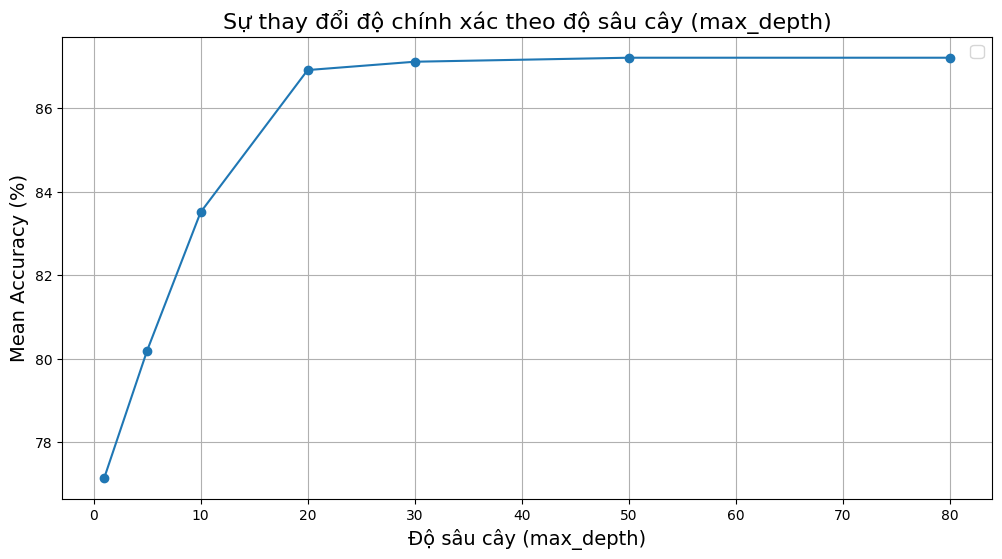

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy', random_state=42, n_estimators=300)

param_grid_rf = {
    'max_depth': [1, 5, 10, 20, 30, 50, 80, None]

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf.fit(X_train_resampled, y_train_resampled)

best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_
print("Best max_depth:", best_params)
print("Best accuracy:", best_score)

# Chuyển đổi kết quả từ GridSearchCV thành DataFrame
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Vẽ biểu đồ sự thay đổi độ chính xác theo độ sâu cây (max_depth)
plt.figure(figsize=(12, 6))
plt.plot(
    cv_results["param_max_depth"],
    cv_results["mean_test_score"]*100,
    marker="o",
    linestyle="-",
)

plt.title("Sự thay đổi độ chính xác theo độ sâu cây (max_depth)", fontsize=16)
plt.xlabel("Độ sâu cây (max_depth)", fontsize=14)
plt.ylabel("Mean Accuracy (%)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# Khởi tạo mô hình Random Forest
rf_tune_resampled = RandomForestClassifier(criterion='entropy',n_estimators=300, max_depth=50,random_state=42)
rf_tune_resampled.fit(X_train_resampled, y_train_resampled)
start_time = time.time()
y_tune_resampled_pred = rf_tune_resampled.predict(X_test_resampled)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
acc = accuracy_score(y_test, y_tune_resampled_pred)*100
result_acc.append(acc)
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 86.60%
Time to predict: 2.3199 seconds


In [ ]:
evaluate_resampled(rf_tune_resampled)

Training accuracy: 1.0
Validation accuracy: 0.8807226543270651
Test accuracy: 0.8660456482881892


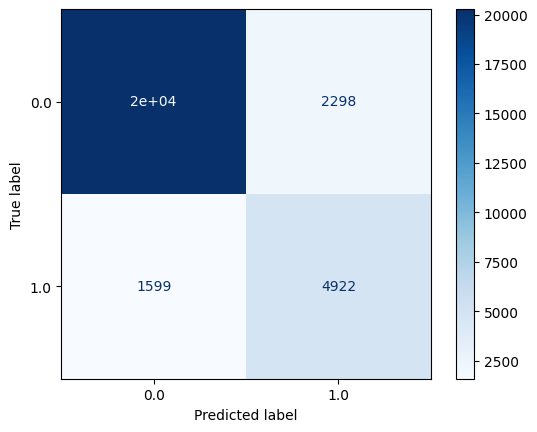

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_tune_resampled, X_test_resampled, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
print(classification_report(y_test, y_tune_resampled_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     22571
         1.0       0.68      0.75      0.72      6521

    accuracy                           0.87     29092
   macro avg       0.80      0.83      0.81     29092
weighted avg       0.87      0.87      0.87     29092



In [ ]:
recall_s = recall_score(y_test, rf_resampled.predict(X_test_resampled), average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là', recall_s[0])
result_recall.append(recall_s)

Tỉ lệ dự đoán đúng ngày mai có mưa là 0.7520318969483208
Tỉ lệ dự đoán đúng ngày mai không có mưa là 0.8987639005803908


## 2. Random Forest - Tự code

In [ ]:
def bootstrap_sample(X, y, n_samples):
    """
    Tạo một bootstrap sample (lấy mẫu ngẫu nhiên có lặp lại).
    """
    indices = np.random.choice(len(X), size=n_samples, replace=True)
    return X.iloc[indices], y.iloc[indices]
def train_decision_tree(X, y, max_depth=None):
    """
    Huấn luyện một Decision Tree trên tập con dữ liệu.
    """
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X, y)
    return tree
def build_random_forest(X, y, n_trees, max_depth=None, sample_size=None):
    """
    Xây dựng một Random Forest với n_trees cây.
    """
    forest = []
    for i in range(n_trees):
        # Bootstrap sampling
        X_sample, y_sample = bootstrap_sample(X, y, sample_size or len(X))
        # Train a decision tree
        tree = train_decision_tree(X_sample, y_sample, max_depth=max_depth)
        forest.append(tree)
    return forest
def predict_random_forest(forest, X):
    """
    Dự đoán bằng cách kết hợp các cây trong Random Forest.
    """
    # Thu thập dự đoán từ tất cả các cây
    predictions = np.array([tree.predict(X) for tree in forest])
    # Voting: Lấy giá trị xuất hiện nhiều nhất (mode)
    majority_votes = mode(predictions, axis=0)[0]
    return majority_votes


### 2.1 No resampled

In [ ]:
# Xây dựng Random Forest
forest = build_random_forest(X_train, y_train, n_trees=200, max_depth=10, sample_size=30000)

# Dự đoán trên tập test
start_time = time.time()
y_pred_by_hand = predict_random_forest(forest, X_test)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
# Đánh giá mô hình
acc=accuracy_score(y_test, y_pred_by_hand)*100
result_acc.append(acc)
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")
print(classification_report(y_test, y_pred_by_hand))

Test Accuracy 86.65%
Time to predict: 2.9868 seconds
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     22571
         1.0       0.79      0.55      0.65      6521

    accuracy                           0.87     29092
   macro avg       0.84      0.75      0.78     29092
weighted avg       0.86      0.87      0.86     29092



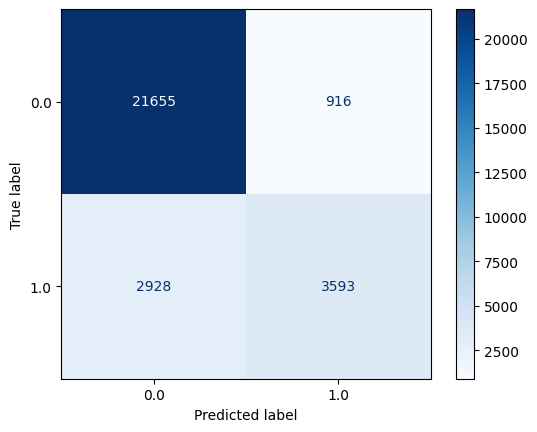

<Figure size 1200x1200 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred_by_hand)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.figure(figsize=(12, 12))
plt.show()

In [ ]:
recall_s = recall_score(y_test, y_pred_by_hand, average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là', recall_s[0])
result_recall.append(recall_s)

Tỉ lệ dự đoán đúng ngày mai có mưa là 0.5488422021162398
Tỉ lệ dự đoán đúng ngày mai không có mưa là 0.9582650303486775


### 2.2 Resampled

In [ ]:
# Xây dựng Random Forest
forest = build_random_forest(X_train_resampled, y_train_resampled, n_trees=200, max_depth=10, sample_size=30000)

# Dự đoán trên tập test
start_time = time.time()
y_pred_by_hand = predict_random_forest(forest, X_test_resampled)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
# Đánh giá mô hình
acc=accuracy_score(y_test, y_pred_by_hand)*100
result_acc.append(acc)
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")
print(classification_report(y_test, y_pred_by_hand))

Test Accuracy 84.48%
Time to predict: 2.9651 seconds
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     22571
         1.0       0.63      0.76      0.69      6521

    accuracy                           0.84     29092
   macro avg       0.78      0.82      0.79     29092
weighted avg       0.86      0.84      0.85     29092



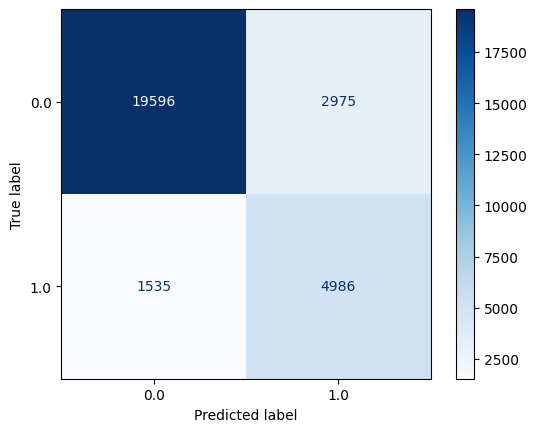

<Figure size 1200x1200 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred_by_hand)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.figure(figsize=(12, 12))
plt.show()

In [ ]:
recall_s = recall_score(y_test, y_pred_by_hand, average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là', recall_s[0])
result_recall.append(recall_s)

Tỉ lệ dự đoán đúng ngày mai có mưa là 0.7636865511424629
Tỉ lệ dự đoán đúng ngày mai không có mưa là 0.8682823091577688


## 3. Model comparing

In [ ]:
result_acc

[87.55671662312663, 86.60456482881892, 86.64925065310051, 84.48370686099271]

In [ ]:
result_recall

[array([0.95844225, 0.58334611]),
 array([0.8987639, 0.7520319]),
 array([0.95826503, 0.5488422 ]),
 array([0.86828231, 0.76368655])]

In [ ]:
pred_time

[4.341000080108643, 2.3199193477630615, 2.9868175983428955, 2.965097665786743]

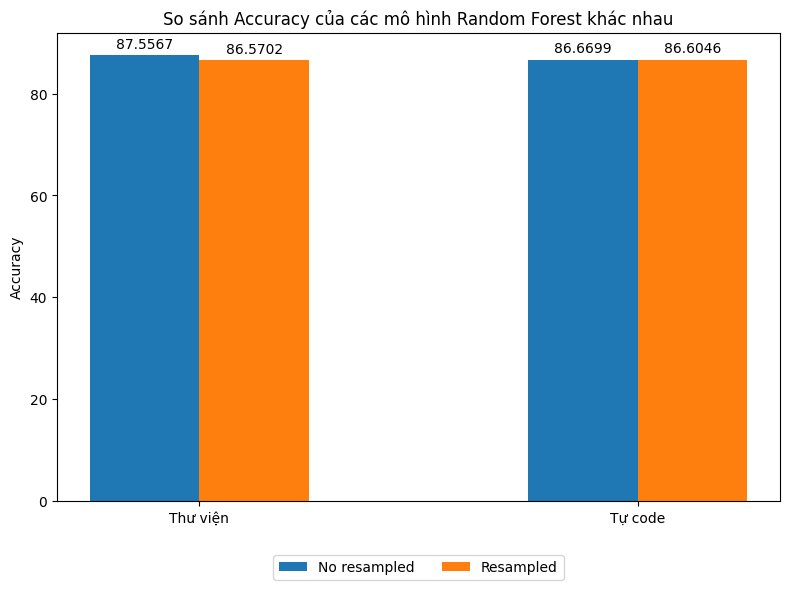

In [ ]:
labels = ['Thư viện', 'Tự code']
no_res = [result_acc[0], result_acc[2]]
res = [result_acc[1], result_acc[3]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, no_res, width, label='No resampled')
rects2 = ax.bar(x + width/2, res, width, label='Resampled')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('So sánh Accuracy của các mô hình Random Forest khác nhau')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

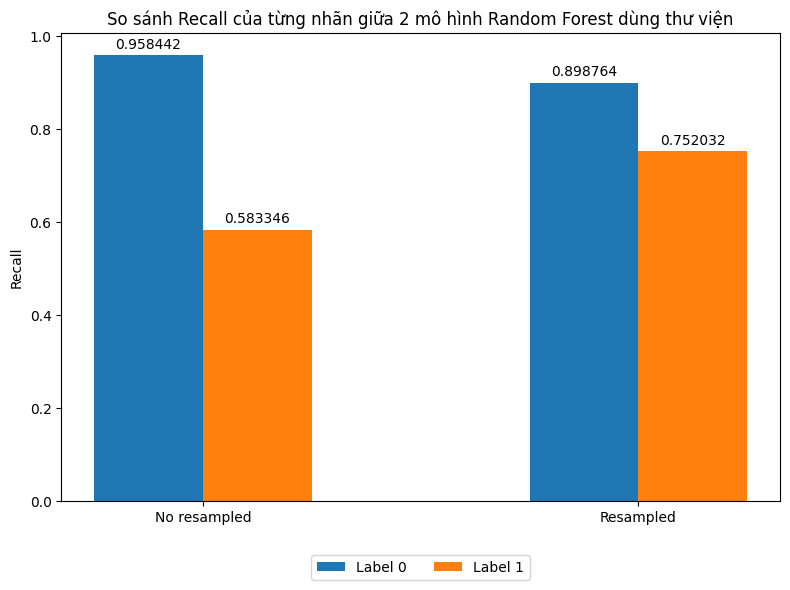

In [ ]:
labels = ['No resampled', 'Resampled']
label_0 = [result_recall[0][0], result_recall[1][0]]
label_1 = [result_recall[0][1], result_recall[1][1]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, label_0, width, label='Label 0')
rects2 = ax.bar(x + width/2, label_1, width, label='Label 1')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Recall')
ax.set_title('So sánh Recall của từng nhãn giữa 2 mô hình Random Forest dùng thư viện')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

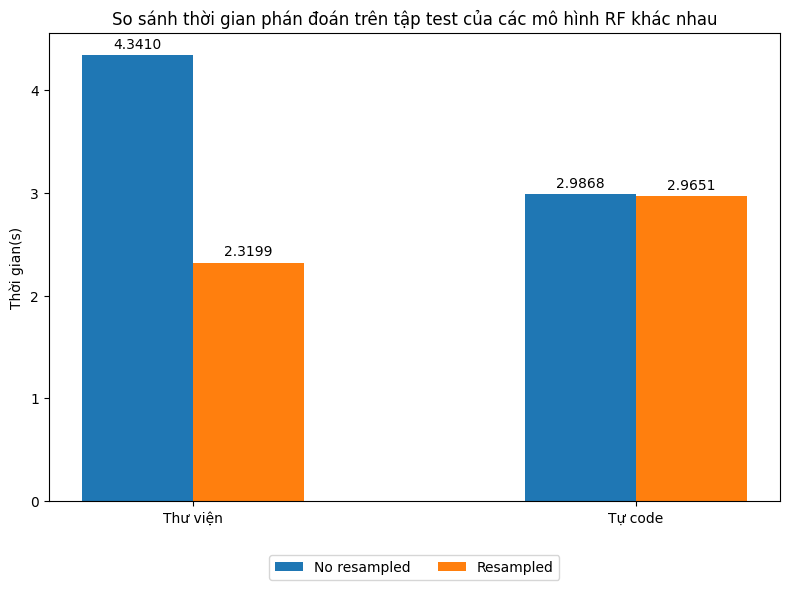

In [ ]:
labels = ['Thư viện', 'Tự code']
no_res = [pred_time[0], pred_time[2]]
res = [pred_time[1], pred_time[3]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, no_res, width, label='No resampled')
rects2 = ax.bar(x + width/2, res, width, label='Resampled')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Thời gian(s)')
ax.set_title('So sánh thời gian phán đoán trên tập test của các mô hình RF khác nhau')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.bar_label(rects1, padding=3, labels=[f"{value:.4f}" for value in no_res])
ax.bar_label(rects2, padding=3, labels=[f"{value:.4f}" for value in res])

fig.tight_layout()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Result/Model_Evaluation/6. Random Forest.pkl'
with open(file_path, 'wb') as f:
    pickle.dump([result_acc,result_recall,pred_time],f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
